# Final Project Morrison

Link to the Kaggle Dataset:
https://www.kaggle.com/datasets/emreksz/software-engineer-jobs-and-salaries-2024

Link to GitHub Repo:
???

# Problem Description

It is a common occurrence for job seekers to find jobs on job listing sites such as Indeed, Linkedin, etc. to look for their future employer. An issue with some of these job postings is that the salary expectation is not given in the posting, leaving job seekers blind to what the employer is expecting to pay for the job. This can be an issue for candidates who land interviews, just to find out that their and the employers salary expectations were vastly different, effectively wasting the time of both the candidate and employer.

Using the salary data from the kaggle dataset, I will engineer features and use them to predict SW engineering salaries to help combat this problem. In this project, I continue the work that I performed on this issue in the first ML course. Previously I used supervised algorithms to predict the salary based on the features I created from the data. The issue is that the feature space I created was extremely large, which presents an issue to some supervised models, such as Linear Regression, due to the curse of dimensionality. In order to optimize my model, I will transform the feature space using the unsupervised principal component analysis algorithm, effectively reducing the features to reduce the effects of the curse of dimensionality.

Using PCA, I hope to further reduce the MSE in the original models' results.

In [58]:
# Import the proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
import scipy.stats as stats
from scipy.stats import norm
import re
import us

# Exploratory Data Analysis

Before building my models to predict the data, I inspect the data and clean it to prepare it for the Machine Learning Algorithms I will implement.

In [59]:
df = pd.read_csv(r'Data/Software Engineer Salaries.csv')

In [60]:
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.)
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,$77K - $94K (Glassdoor est.)
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,$71K - $100K (Glassdoor est.)
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,$94K - $148K (Glassdoor est.)
9,PFF,4.2,Sr. Software Engineer,Remote,1d,$147K - $189K (Employer est.)


In [61]:
df.tail(10)

,Company,Company Score,Job Title,Location,Date,Salary
860,Westchester Community College,NaN,Software Development Engineer in Test,"San Francisco, CA",30d+,NaN
861,DPS Telecom,NaN,Software & System Dev. Sr. Engineer,"Raymond, OH",30d+,NaN
862,Roblox,NaN,Software Engineer II,"Valhalla, NY",3d,NaN
863,OpenAI,NaN,Embedded Software Engineer (Entry-Level),"Lake Hopatcong, NJ",2d,NaN
864,"Akina, Inc.",NaN,Senior Software Engineer - App Orchestration,"San Mateo, CA",30d+,NaN
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN
869,NaN,NaN,GUI Software Engineer II - Surgical Robotics,"Boston, MA",10d,NaN


In [62]:
df.shape

(870, 6)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [64]:
df.describe(include='all')

,Company,Company Score,Job Title,Location,Date,Salary
count,868,789.000000,870,857,870,764
unique,648,NaN,542,329,31,680
top,CVS Health,NaN,Software Engineer,United States,30d+,$120K - $150K (Employer est.)
freq,9,NaN,156,48,206,5
mean,NaN,3.895311,NaN,NaN,NaN,NaN
std,NaN,0.524952,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,3.600000,NaN,NaN,NaN,NaN
50%,NaN,3.900000,NaN,NaN,NaN,NaN
75%,NaN,4.200000,NaN,NaN,NaN,NaN


In [65]:
# Extract the salary information, transform the range into a single number via averaging, and convert to an int
def clean_salary(salary_str):
    salary_range = re.findall(r'\$([\dK]+)', salary_str)
    salary_range = [int(s.replace('K', '')) * 1000 for s in salary_range]
    if len(salary_range) == 1:
        return salary_range[0]
    elif len(salary_range) > 1:
        return np.mean(salary_range)
    else:
        return None

df['Salary'] = df['Salary'].astype(str)
df['Mean Salary'] = df['Salary'].apply(lambda x: pd.Series(clean_salary(x)))

def extract_seniority(title):
    seniority_terms = ['Junior', 'Senior', 'Lead', 'Manager', 'Associate']
    for term in seniority_terms:
        if term in title:
            return term
    return 'Unknown'

def extract_role(title):
    role_terms = ['Engineer', 'Developer', 'Scientist', 'Analyst', 'Architect']
    for term in role_terms:
        if term in title:
            return term
    return 'Unknown'

def extract_specialization(title):
    # Customize this list based on your data
    specialization_terms = ['Fullstack', 'Backend', 'Frontend', 'Data', 'C#', 'Java', 'Python']
    for term in specialization_terms:
        if term in title:
            return term
    return 'Unknown'

# Apply these functions to the job titles
df['Seniority'] = df['Job Title'].apply(extract_seniority)
df['Role'] = df['Job Title'].apply(extract_role)
df['Specialization'] = df['Job Title'].apply(extract_specialization)

# Extract the City, State, and Remote data
def clean_location(location):
    
    def state_name_abbr_conversion(state_name):
        state = us.states.lookup(state_name)
        return state.abbr if state else None
    
    if location == None:
        return None, None, None
    area = location.split(',')
    if len(area) == 2:
        city = area[0].strip()
        state = area[1].strip()
        remote = False
    elif 'Remote' or 'United States' in location:
        city, state = None, None
        remote = True
    else:
        city, state = None, state_name_abbr_conversion(location)
        remote = False
    return city, state, remote

df['Location'] = df['Location'].astype(str)
df[['City', 'State', 'Remote']] = df['Location'].apply(lambda x: pd.Series(clean_location(x)))

# Make a data frame with the Mean Salary, City, State, Company Score, Company, and Remote Data
clean_df = df.drop(['Job Title', 'Location', 'Salary', 'Date'], axis=1)

In [66]:
clean_df

,Company,Company Score,Mean Salary,Seniority,Role,Specialization,City,State,Remote
0,ViewSoft,4.8,81000.0,Unknown,Engineer,Unknown,Manassas,VA,False
1,Workiva,4.3,82500.0,Unknown,Engineer,Unknown,None,None,True
2,"Garmin International, Inc.",3.9,106500.0,Unknown,Engineer,C#,Cary,NC,False
3,Snapchat,3.5,121000.0,Unknown,Engineer,Fullstack,Los Angeles,CA,False
4,Vitesco Technologies Group AG,3.1,96500.0,Unknown,Engineer,Unknown,Seguin,TX,False
...,...,...,...,...,...,...,...,...,...
865,RXO,NaN,NaN,Unknown,Engineer,Unknown,San Francisco,CA,False
866,Infosys,NaN,NaN,Unknown,Engineer,Unknown,Annapolis Junction,MD,False
867,Medtronic,NaN,NaN,Senior,Engineer,Unknown,Southfield,MI,False
868,NaN,NaN,NaN,Junior,Developer,Python,Charlotte,NC,False


In [67]:
# Remove the null rows from the data or fill in with default data
clean_df['City'] = clean_df['City'].fillna("Unknown")
clean_df['State'] = clean_df['State'].fillna("Unknown")
clean_df['Company'] = clean_df['Company'].fillna("Unknown")
clean_df = clean_df.dropna(subset=['Mean Salary', 'Company Score'])
print(f'isna:\n{clean_df.isna().sum()}\n')
print(f'isnull:\n{clean_df.isnull().sum()}')
clean_df.shape

isna:
Company           0
Company Score     0
Mean Salary       0
Seniority         0
Role              0
Specialization    0
City              0
State             0
Remote            0
dtype: int64

isnull:
Company           0
Company Score     0
Mean Salary       0
Seniority         0
Role              0
Specialization    0
City              0
State             0
Remote            0
dtype: int64


(764, 9)

# Model Building and Analysis

For each model that I originally used to predict the SW engineering salaries, I will run the base models, and then transform the feature space using PCA and rerun the models using the reduced feature space. I will then gather the MSE values for the models that did and did not use PCA in order to analyze the results.

## Basic Linear Regressor

In [68]:
# Linear Regression Model
# Encode categorical variables
clean_df = pd.get_dummies(clean_df, columns=['Remote', 'City', 'Specialization', 'Role'], drop_first = True)

label_encoder = LabelEncoder()
clean_df['Seniority'] = label_encoder.fit_transform(clean_df['Seniority'])

# Define the variables for the linear model
X = clean_df.drop(columns=['State', 'Mean Salary', 'Company'])
y = clean_df['Mean Salary']

# Ensure compatibility with statsmodels
X = X.astype(float)
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Add constants to the feature data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

linear_model = sm.OLS(y_train, X_train).fit()
print(f'Model Summary:\n{linear_model.summary()}')

y_pred_te = linear_model.predict(X_test)
mse_te_lr = mean_squared_error(y_pred_te, y_test)
print(f'\nTest Mean Squared Error is: {mse_te_lr}')

y_pred_tr = linear_model.predict(X_train)
mse_tr_lr = mean_squared_error(y_pred_tr, y_train)
print(f'Train Mean Squared Error is: {mse_tr_lr}\n')

r2_lr = linear_model.rsquared
print(f'Model R^2 is: {r2_lr}')

Model Summary:
                            OLS Regression Results                            
Dep. Variable:            Mean Salary   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.9189
Date:                Tue, 01 Oct 2024   Prob (F-statistic):              0.761
Time:                        14:29:03   Log-Likelihood:                -7301.5
No. Observations:                 611   AIC:                         1.508e+04
Df Residuals:                     371   BIC:                         1.614e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const  

## Forward Selection Method
Here I will use forward selection to attempt to improve the R^2 and MSE value from the model that included all the features. I will compare this feature reduction technique with the PCA feature reduction technique.

In [71]:
# Convert to DataFrame for feature selection
# Initialize an empty model with only the intercept
initial_features = []
remaining_features = X_train.columns.tolist()
best_mse_lrfs = np.inf  # Initialize with a large value
best_r2_lrfs = -np.inf

# Forward selection process
while remaining_features:
    mse_list = []
    r2_list = []
    for feature in remaining_features:
        # Try adding each feature one by one
        current_features = initial_features + [feature]
        X_train_subset = X_train[current_features]
        
        # Fit the model with the current set of features
        model = sm.OLS(y_train, X_train_subset).fit()
        y_pred = model.predict(X_test[current_features])
        
        # Compute MSE for the test set
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append((feature, mse))
        r2_list.append(model.rsquared)

    # Find the feature that provides the lowest MSE
    best_feature, best_feature_mse = min(mse_list, key=lambda x: x[1])
    best_feature_r2 = max(r2_list)

    if best_feature_r2 > best_r2_lrfs:
        best_r2_lrfs = best_feature_r2
    
    if best_feature_mse < best_mse_lrfs:
        # Add this feature to the model
        initial_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_mse_lrfs = best_feature_mse
    else:
        # Stop if adding more features does not improve the model
        break

print(f"Selected features: {initial_features}")
print(f'best mse: {best_mse_lrfs:.4f}')
print(f'best r2: {best_r2_lrfs:.4f}')


Selected features: ['const', 'Specialization_Frontend', 'City_Chicago', 'Company Score', 'City_Boston', 'City_Pittsburgh', 'City_Alpharetta', 'City_New York', 'City_Palo Alto', 'City_Washington', 'City_Jacksonville', 'City_Deerfield', 'City_Los Angeles', 'City_Melbourne', 'City_Denver', 'City_Seattle', 'City_Cary', 'City_Atlanta', 'City_Annapolis Junction', 'City_Dallas', 'City_Moorpark', 'City_Bellevue', 'City_Salem', 'Specialization_Data', 'Specialization_Unknown', 'Specialization_Python', 'City_Wilmington', 'City_Albuquerque', 'City_College Park', 'City_Manassas', 'City_Lexington', 'City_West Bend', 'City_Norcross', 'Role_Unknown', 'City_Plainsboro', 'City_Framingham', 'City_Shippensburg', 'City_Northborough', 'City_Fairborn', 'City_Greenwood Village', 'Specialization_Java', 'City_Boulder', 'City_Lenexa', 'City_Olathe', 'City_Warrenton', 'City_Plano', 'City_Phoenix', 'City_Georgetown', 'City_Mountain View', 'City_Jackson', 'City_Chalfont', 'City_Germantown', 'City_Lorton', 'City_Irv

## PCA Model 
Here I create the unsupervised PCA model and store the principal components into a vector that will be used to find the best parameters for each supervised model

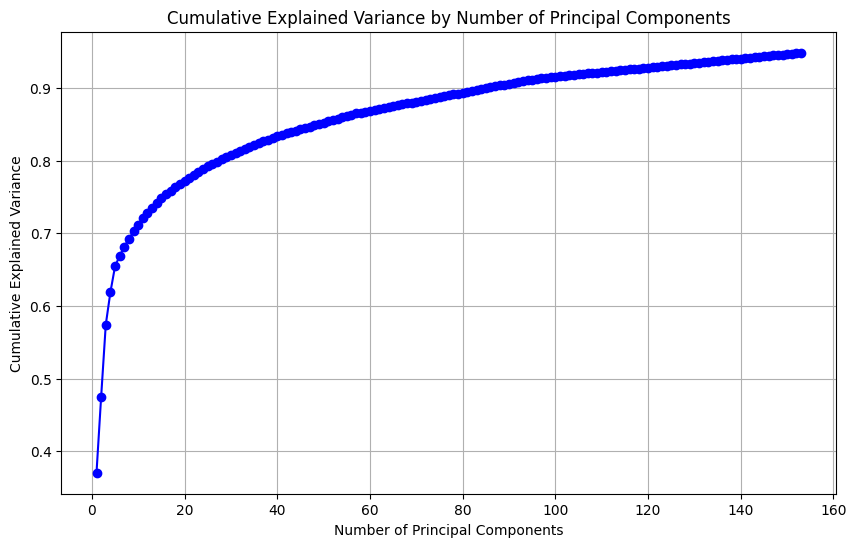

In [29]:
# Use PCA to reduce the feature space to improve the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# Use a loop to test how many Prnicipal components to keep with the model
principal_components_tr = []
principal_components_te = []
for num_comp in range(1, 154):
    pca = PCA(n_components=num_comp)
    principal_components_tr.append(pca.fit_transform(X_train))
    principal_components_te.append(pca.transform(X_test))

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 154), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()    

## Explained Var Ratio

The cumulative explained variance can be seen above. While it looks like at around 90 components that 90% of the variability is explained in the data, which is a good benchmark to use for the number of components to include in the models, I will nonetheless loop through all of the components, building each model and seeing which models produce the best results, effectively tailoring the number of components to each model.

## Using PCA on the Linear Regressor

In [33]:
# Test how PCA compares with Forward Selection test on all Principal Components on the data and find the best params
best_mse_tr_lr_w_pca = np.inf
best_mse_te_lr_w_pca = np.inf
best_number_of_components_tr = 0
best_number_of_components_te = 0
best_r2 = -np.inf
best_r2_feat = 0

for feature_idx in range(len(principal_components_tr)):
    X_train_pca_const = sm.add_constant(principal_components_tr[feature_idx])
    X_test_pca_const = sm.add_constant(principal_components_te[feature_idx])
    linear_model_pca = sm.OLS(y_train, X_train_pca_const).fit()
    y_pred_tr = linear_model_pca.predict(X_train_pca_const)
    y_pred_te = linear_model_pca.predict(X_test_pca_const)

    mse_tr_lr_w_pca = mean_squared_error(y_train, y_pred_tr)
    mse_te_lr_w_pca = mean_squared_error(y_test, y_pred_te)

    if linear_model_pca.rsquared > best_r2:
        best_r2 = linear_model_pca.rsquared
        best_r2_feat = feature_idx

    if mse_tr_lr_w_pca < best_mse_tr_lr_w_pca:
        best_mse_tr_lr_w_pca = mse_tr_lr_w_pca
        best_number_of_components_tr = feature_idx

    if mse_te_lr_w_pca < best_mse_te_lr_w_pca:
        best_mse_te_lr_w_pca = mse_te_lr_w_pca
        best_number_of_components_te = feature_idx

print(f'min training MSE is {best_mse_tr_lr_w_pca} at {best_number_of_components_tr} number of components')
print(f'min testing MSE is {best_mse_te_lr_w_pca} at {best_number_of_components_tr} number of components')
print(f'max r2 is {best_r2} at {best_r2_feat} number of components')

min training MSE is 1651673982.6945767 at 150 number of components
min testing MSE is 2391230446.8145356 at 150 number of components
max r2 is 0.26091728866446584 at 150 number of components


## Construct base SVM, RF, and GB Supervised Models
Here I create base models for SVM, RF, and Gradient Boosting to compare the results of these models using the original feature space to these models using the PCA feature space

### Support Vector Machine

In [38]:
# Use a Support Vector Machine Classifier to see if there is better performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the SVM model
svm_model = SVR(kernel='poly')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate mean squared error
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'Mean Squared Error is: {mse_svm}')

# Calculate R^2
r2_svm = r2_score(y_test, y_pred_svm)
print(f'SVM R² Score: {r2_svm:.4f}')

Mean Squared Error is: 2477573340.474337
SVM R² Score: -0.0426


### Random Forest

In [39]:
# Random Forest Predictor
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model on training data
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

# Calculate R^2
r2_rf = r2_score(y_test, y_pred_rf)
print(f'RF R² Score: {r2_rf:.4f}')

Random Forest Mean Squared Error: 3283927185.6145163
RF R² Score: -0.3819


### Gradient Boosting

In [40]:
# Gradient Boost Regressor
# Initialize the Gradient Boosting Regressor
gb_rg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.00001, max_depth=7, random_state=42)

# Fit the model on training data
gb_rg.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_rg.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gb)
r2_gbr = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gbr:.4f}')
print(f'Gradient Boosting Regressor R² Score: {r2_gbr:.4f}')

Gradient Boosting Regressor Mean Squared Error: 2375646673.7202
Gradient Boosting Regressor R² Score: 0.0003


## Using PCA feat reduction on the SVM, RF, and GB models
Here I use the PCA model/features I created, but will implement them into the SVM, Random Forest, and Gradient Booting methods to compare them with the base models.

In [32]:
## Test each model on the PCA features and determine best MSE
scaler = StandardScaler()
models = [SVR(kernel='poly'), RandomForestRegressor(n_estimators=500, random_state=42), GradientBoostingRegressor(n_estimators=1000, learning_rate=0.00001, max_depth=7, random_state=42)]
best_mse_svr_w_pca = np.inf
best_mse_rf_w_pca = np.inf
best_mse_gb_w_pca = np.inf
best_number_of_components_svr = 0
best_number_of_components_rf = 0
best_number_of_components_gb = 0
best_r2_svr = -np.inf
best_r2_rf = -np.inf
best_r2_gb = -np.inf
best_r2_feat_svr = -np.inf
best_r2_feat_rf = -np.inf
best_r2_feat_gb = -np.inf
for feature_idx in range(len(principal_components_tr)):
    print(f'Analyzing results at {feature_idx+1} components')
    for i, model in enumerate(models):
        model.fit(principal_components_tr[feature_idx], y_train)
        y_pred = model.predict(principal_components_te[feature_idx])
        current_r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        if i == 0:
            if mse < best_mse_svr_w_pca:
                best_mse_svr_w_pca = mse
                best_number_of_components_svr = feature_idx
            if current_r2 > best_r2_svr:
               best_r2_svr = current_r2
               best_r2_feat_svr = feature_idx
        elif i == 1:
            if mse < best_mse_rf_w_pca:
                best_mse_rf_w_pca = mse
                best_number_of_components_rf = feature_idx
            if current_r2 > best_r2_rf:
               best_r2_rf = current_r2
               best_r2_feat_rf = feature_idx
        else:
            if mse < best_mse_gb_w_pca:
                best_mse_gb_w_pca = mse
                best_number_of_components_gb = feature_idx
            if current_r2 > best_r2_gb:
                best_r2_gb = current_r2
                best_r2_feat_gb = feature_idx
print(f'min MSE for SVM is {best_mse_svr_w_pca} at {best_number_of_components_svr} number of components. Best r2 is {best_r2_svr} at {best_r2_feat_svr} number of components')
print(f'min MSE for RF is {best_mse_rf_w_pca} at {best_number_of_components_rf} number of components. Best r2 is {best_r2_rf} at {best_r2_feat_rf} number of components')
print(f'min MSE for GB is {best_mse_gb_w_pca} at {best_number_of_components_gb} number of components. Best r2 is {best_r2_gb} at {best_r2_feat_gb} number of components')


Analyzing results at 1 components
Analyzing results at 2 components
Analyzing results at 3 components
Analyzing results at 4 components
Analyzing results at 5 components
Analyzing results at 6 components
Analyzing results at 7 components
Analyzing results at 8 components
Analyzing results at 9 components
Analyzing results at 10 components
Analyzing results at 11 components
Analyzing results at 12 components
Analyzing results at 13 components
Analyzing results at 14 components
Analyzing results at 15 components
Analyzing results at 16 components
Analyzing results at 17 components
Analyzing results at 18 components
Analyzing results at 19 components
Analyzing results at 20 components
Analyzing results at 21 components
Analyzing results at 22 components
Analyzing results at 23 components
Analyzing results at 24 components
Analyzing results at 25 components
Analyzing results at 26 components
Analyzing results at 27 components
Analyzing results at 28 components
Analyzing results at 29 compo

# Results
Below is a bar chart that shows how the base models without feature reduction compared to those with PCA feature reduction. In addition, a bell curve plotting the residuals from the best model is displayed.

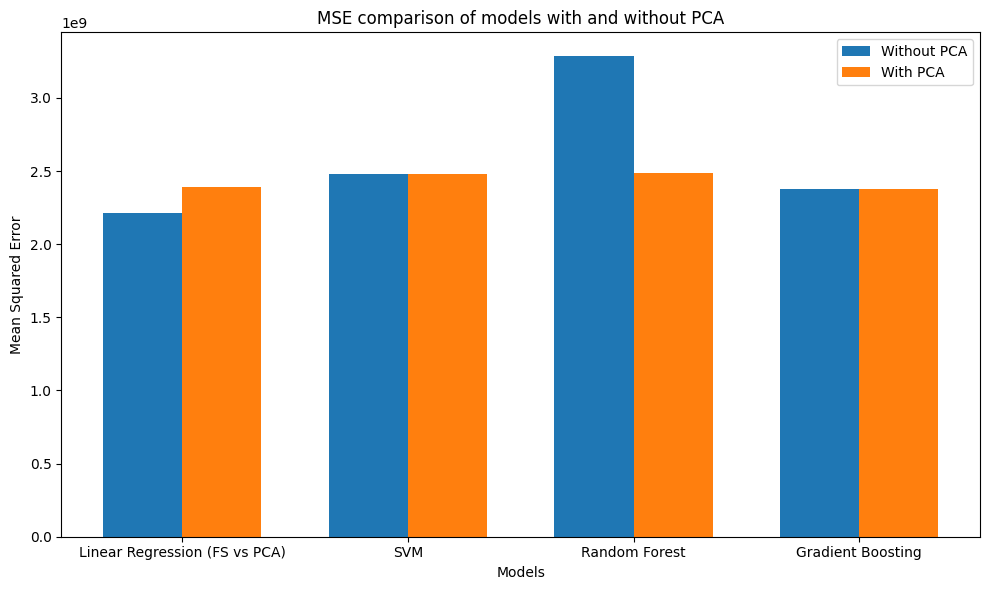

In [73]:
# Model names
models = ['Linear Regression (FS vs PCA)', 'SVM', 'Random Forest', 'Gradient Boosting']

# MSE values
mse_without_pca = [best_mse_lrfs, mse_svm, mse_rf, mse_gbr]  # MSE values without PCA
mse_with_pca = [best_mse_te_lr_w_pca, best_mse_svr_w_pca, best_mse_rf_w_pca, best_mse_gb_w_pca]     # MSE values with PCA

# Bar positions
bar_width = 0.35  # Width of the bars
index = np.arange(len(models))  # Index for each group (each model)

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(index, mse_without_pca, bar_width, label='Without PCA')
bars2 = ax.bar(index + bar_width, mse_with_pca, bar_width, label='With PCA')

ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('MSE comparison of models with and without PCA')
ax.set_xticks(index + bar_width / 2)  # Centering the ticks
ax.set_xticklabels(models)

ax.legend()

plt.tight_layout()
plt.show()

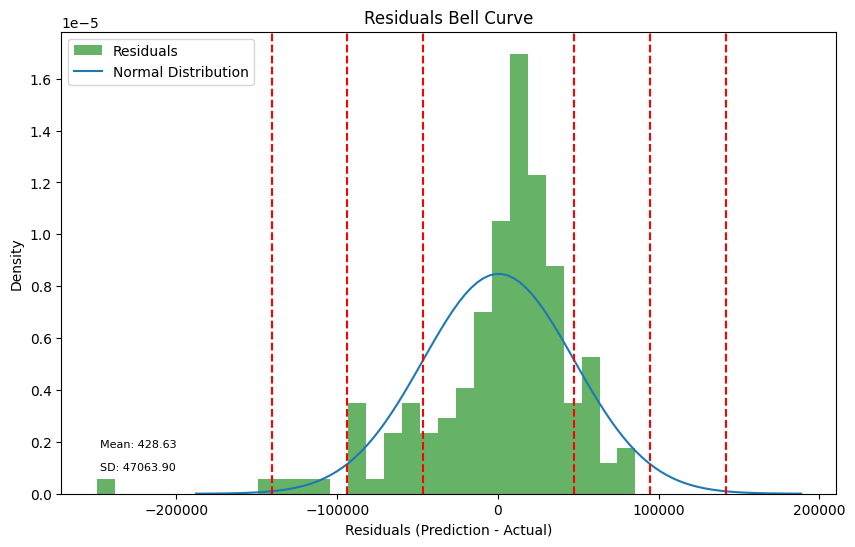

In [72]:
# Re-create the best model, extract the residuals, and plot the bell curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

best_model = sm.OLS(y_train, X_train[initial_features]).fit()
y_pred = best_model.predict(X_test[initial_features])

pred_test_vals = [(y_pred_i, y_test_i) for y_pred_i, y_test_i in zip(y_pred, y_test)]

# residuals (predictions - actual values)
residuals = np.array([pred - actual for pred, actual in pred_test_vals])

# Calculate mean and standard deviation
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Generate x values for the bell curve
x_values = np.linspace(mean_residuals - 4*std_residuals, mean_residuals + 4*std_residuals, 100)

plt.figure(figsize=(10,6))

# Plot the histogram
hist = plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g', label="Residuals")

# Plot the bell curve (normal distribution)
curve, = plt.plot(x_values, norm.pdf(x_values, mean_residuals, std_residuals), label="Normal Distribution")

# Plot vertical lines for standard deviations
for i in range(1, 4):
    line1 = plt.axvline(mean_residuals + i*std_residuals, color='r', linestyle='--', label=f'+{i} SD')
    line2 = plt.axvline(mean_residuals - i*std_residuals, color='r', linestyle='--', label=f'-{i} SD')

plt.annotate(f'Mean: {mean_residuals:.2f}', xy=(0.05, 0.1), xycoords='axes fraction', fontsize=8, color='black')
plt.annotate(f'SD: {std_residuals:.2f}', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=8, color='black')

# customize which parts of the plot appear in the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Filter out unwanted legend labels
desired_handles = [handles[0], handles[1]]  # Only show 'Normal Distribution'
desired_labels = [labels[0], labels[1]]

plt.legend(desired_handles, desired_labels)  # Create the legend with filtered labels

# Show plot
plt.title("Residuals Bell Curve")
plt.xlabel("Residuals (Prediction - Actual)")
plt.ylabel("Density")
plt.show()

# Discussion/Conclusion

Based on the bar chart, the model that performed the best was still the linear regressor with forward selection to reduce the features. This could be because forward selection directly selects the most relevant features based on the model's performance, rather than based on variance as in PCA. Forward selection tailors the feature selection process to the model's outcome, which has a direct impact on how well it performs. PCA is great for reducing dimensionality, but it doesn't always keep the features that are result in the best predictions of the target, which may be why it underperformed compared to PCA.

SVM and Gradient Boosting saw no effect between keeping all of the features and reducing the features using PCA. This demonstrates that these models are capable of producing consistent results in spite of how large a feature space may be. Therefore, PCA did not provide additional value in improving their performance. 

The model that saw the largest improvement using PCA to reduce the feature space was random forest. This is an intially suprising result, considering that random forest are generally capable of handling a larger feature space. Nonetheless, the feature space could have contained highly correlated features, which impacts how well random forests are able to generalize to the test data. Since PCA not only reduces the feature space, but also decorrelates the data, the random forrest model saw substantial improvement. Therfore, when the random forrest model is presented with highly correlated data, it could still substantially benefit from the PCA feature reduction technique.


Overall, the supervised models gave adequate predictions of salary information so that they could be used in practical applications. For example, given that some companies do not give a salary range for their job postings, one of these models could be used to predict the salary based on the job title, location, and company score (which could be looked up online). Nonetheless, the prediction has a significant likelihood of having a large error, rendering the result of the prediction to be untrustworthy. Looking at the bell curve for the Linear Regressor with Forward Selection, the model was off on average by $\$$428.63, which is not bad on the surface, however, the data is spread fairly wide with a standard deviation of $\$$47,063.90. This means that approximately 70% of the predictions are within a $\$$47,063.90 tolerance. That being said, there are some significant outliers affecting the bell curve plot in the model. One prediction was about $\$$250,000 off of the actual value. This has a significant impact on the mean and standard deviation.

A way to improve the predictions would be to work on tuning the features more for each model, even doing more feature engineering past PCA. One of the best ways to improve these models is to find more important features. For example, one highly correlated feature with salary is years of experience. If the expected 'years of experience' data could be extracted from the job postings, perhaps this would make a better feature than 'job title' which is a categorical feature. More numerical features could be helpful in predicting the salaries rather than the categorical variables that I was able to attain in the dataset.

In conclusion, while the linear regressor model with feature selection performed the best over the rest of the models, it still contained a significant amount of error. While this could introduce a lack of trust in the model's predictions in a real-world scenario, the prediction could still be used as a practical baseline, since the user understands there may be siginifanct error in the prediction.